### Flavia Carravieri
# <span style="color:deeppink"> NSL - ESERCITAZIONE 12 </span>

### MNIST with Keras

L'obbiettivo di questa esercitazione è usare una rete neurale profonda per distinguere 10 cifre (da 0 a 9) scritte a mano provenienti dal MNIST dataset. Esso comprende $70000$ cifre, ognuna rappresentata in un immagine quadrata da $28\times 28$ pixel che possono assumere $256$ sfumature di grigio, perciò ogni data point può assumere un valore in $\{0,1,\dots,255\}$. Questo problema è un generico compito di classificazione, dove ogni immagine deve ricadere in una delle dieci categorie, le dieci cifre. 

### Esercizio 12.1
La DNN è stata modificata a dovere, cambiando il numero di epoce e provando diversi ottimizzatori per valutare la performance nei diversi casi e infine scegliere la struttura migliore.  

#### Step 1: importazione dati

In [19]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist #dataset 

seed=0
np.random.seed(seed) # fix random seed, tipicamente si deve settare ogni volta. Non c'è una garnde cultura di fissare il seed nel deep learning
tf.random.set_seed(seed)

# input 
img_rows, img_cols = 28, 28 # dimensione immagine (in pixel)
# output
num_classes = 10 # cifre possobili

# suddivisione dei dati in train e test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape dei dati: da matrice a vettore (?)
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# le componenti dell'immagine divenano float (prima erano interi che indicano le gradazioni di grigio)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

#### Step 2: definizione della rete neurale e della sua architettura

Si può ora proseguire alla costruzione della deep neural net. Si usa la classe `Sequential()` di Keras per istanziare il modello e si aggiungono deep layers con il metodo `add()`.

Per questo esecizio è sufficiente usare layer `Dense`. Ognuno di essi accetta come argomenti: un intero che specifica il numero di neuroni e la funzione di attivazione (ad esempio `relu`, `tanh`, `elu`, `sigmoid`, `softmax`). 

Affinchè la DNN funzioni a dovere, bisogna ssicurarsi che il numero di neuroni di input e output di ogni layer coincida. Per questo si specifica la forma dell'input nel primo layer, cosicchè la costruzione sequenziale del modello permetta a Keras di aggiustare le dimensioni di input e output di tutti i layer nascosti. Resta soltanto da specificare la dimensione dell'output finale in modo che coincida con il numero di categorie.  

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer 400 neuroni
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer 100 neuroni
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5 50% di dropout
    model.add(Dropout(0.5))
    # soft-max layer rendo il flusso di dati trasformati in probabilità 
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


#### Step 3: Scelta dell'ottimizzatore e della loss function

Come loss function si è scelta la `categorical_crossentropy`, come tipicamente si usa per problemi di classificazione, mentre per ottimizzatore si sono provate diverse funzioni: SGD, SMSprop e Adadelta. 

In [40]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
#usiamo stochastic gradient descent come ottimizzatore, metrica è accuracy e loss è categorical crossentropy
def compile_model_RMSprop():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['acc'])
    return model

def compile_model_SGD():
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

def compile_model_Adadelta():
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Step 4: Allenamento del modello

Si allena la DNN in minibatches.
Il modello viene allenato per un certo numerdo di epoche, in ognuna delle quali si usato tutti i dati raggruppati in minibatches. 


#### SGD

In [42]:
# training parameters
batch_size = 32
epochs = 30

# create the deep neural net
model_DNN_SGD = compile_model_SGD()

# train DNN and store training info in history su history c'è il training del modello;
history_SGD = model_DNN_SGD.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=1, # monitoraggio
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.6322 - loss: 1.1827 - val_acc: 0.9134 - val_loss: 0.3182
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8797 - loss: 0.4200 - val_acc: 0.9299 - val_loss: 0.2448
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9079 - loss: 0.3289 - val_acc: 0.9396 - val_loss: 0.2053
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9202 - loss: 0.2787 - val_acc: 0.9462 - val_loss: 0.1802
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9298 - loss: 0.2450 - val_acc: 0.9512 - val_loss: 0.1601
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9384 - loss: 0.2200 - val_acc: 0.9547 - val_loss: 0.1471
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9429 - loss: 0.1974 - val_acc: 0.9575 - val_loss: 0.1350
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9489 - loss: 0.1830 - val_acc: 0.9606 - val_loss: 0.1247
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━

#### Adadelta

In [48]:
model_DNN_Adadelta = compile_model_Adadelta()

batch_size = 32
epochs = 30

# train DNN and store training info in history su history c'è il training del modello; siccome è complesso ci metto solo 5 epoche (NON CONSEGNARE ESECIZI CON 5 EPOCHE, FARNE ALMENO UNA 30)
history_Adadelta = model_DNN_Adadelta.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.1550 - loss: 2.3251 - val_acc: 0.4227 - val_loss: 2.1069
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2825 - loss: 2.1127 - val_acc: 0.5783 - val_loss: 1.9200
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.4114 - loss: 1.9384 - val_acc: 0.6613 - val_loss: 1.7407
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5015 - loss: 1.7748 - val_acc: 0.7182 - val_loss: 1.5681
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5622 - loss: 1.6226 - val_acc: 0.7526 - val_loss: 1.4112
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.6047 - loss: 1.4938 - val_acc: 0.7746 - val_loss: 1.2731
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.6305 - loss: 1.3771 - val_acc: 0.7949 - val_loss: 1.1546
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.6592 - loss: 1.2797 - val_acc: 0.8066 - val_loss: 1.0542
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━

#### RMSprop

In [44]:
# create the deep neural net
model_DNN_RMSprop = compile_model_RMSprop()

# train DNN and store training info in history su history c'è il training del modello; siccome è complesso ci metto solo 5 epoche (NON CONSEGNARE ESECIZI CON 5 EPOCHE, FARNE ALMENO UNA 30)
history_RMSprop = model_DNN_RMSprop.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.8641 - loss: 0.4552 - val_acc: 0.9649 - val_loss: 0.1260
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9600 - loss: 0.1534 - val_acc: 0.9720 - val_loss: 0.1139
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9680 - loss: 0.1325 - val_acc: 0.9732 - val_loss: 0.1306
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9736 - loss: 0.1176 - val_acc: 0.9720 - val_loss: 0.1495
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.9743 - loss: 0.1154 - val_acc: 0.9787 - val_loss: 0.1216
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9756 - loss: 0.1136 - val_acc: 0.9755 - val_loss: 0.1489
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9766 - loss: 0.1157 - val_acc: 0.9767 - val_loss: 0.1552
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.9774 - loss: 0.1115 - val_acc: 0.9766 - val_loss: 0.1792
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━

#### Step 5: valutazione del modello e predizione su nuovi dati 
Si valuta il modello tramite il metodo `evaluate`. Per testare la performance del modello, nei problemi di classificazione spesso si guarda all'`accuracy`, definita come la percentuale di punti classificati correttamente. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9751 - loss: 0.0782
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9750 - loss: 0.3513
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8748 - loss: 0.4940

Test loss SGD: 0.06709194928407669
Test accuracy SGD : 0.9789999723434448

Test loss RMSprop: 0.28339698910713196
Test accuracy RMSprop: 0.9799000024795532

Test loss Adadelta: 0.430601567029953
Test accuracy Adadelta: 0.8946999907493591


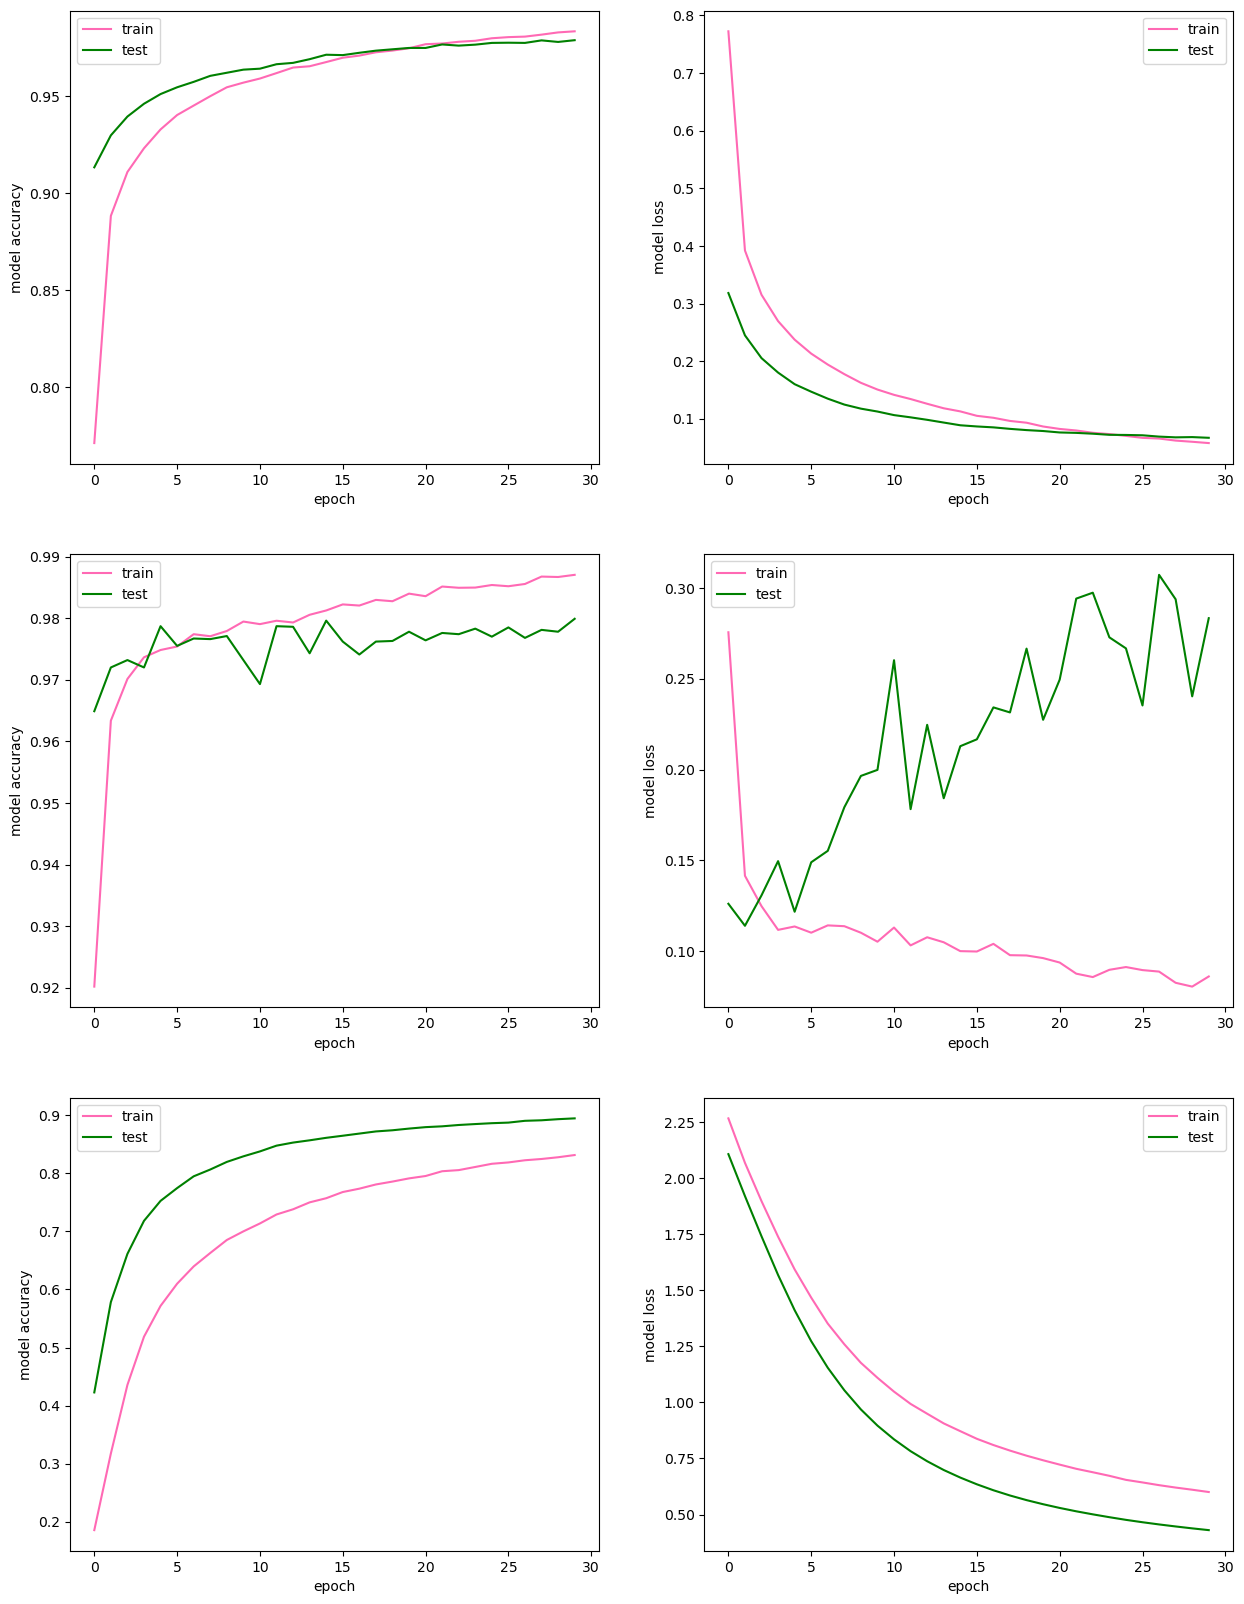

In [52]:
# evaluate model
score_SGD = model_DNN_SGD.evaluate(X_test, Y_test, verbose=1)
score_RMSprop = model_DNN_RMSprop.evaluate(X_test, Y_test, verbose=1)
score_Adadelta=model_DNN_Adadelta.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss SGD:', score_SGD[0])
print('Test accuracy SGD :', score_SGD[1])

print()
print('Test loss RMSprop:', score_RMSprop[0])
print('Test accuracy RMSprop:', score_RMSprop[1])

print()
print('Test loss Adadelta:', score_Adadelta[0])
print('Test accuracy Adadelta:', score_Adadelta[1])


fig, axs =plt.subplots(3,2, figsize=(15, 20))

# summarize history for accuracy
axs[0,0].plot(history_SGD.history['acc'], color="hotpink")
axs[0,0].plot(history_SGD.history['val_acc'], color="green")
axs[0,0].set_ylabel('model accuracy')
axs[0,0].set_xlabel('epoch')
axs[0,0].legend(['train', 'test'], loc='best')

axs[1,0].plot(history_RMSprop.history['acc'], color="hotpink")
axs[1,0].plot(history_RMSprop.history['val_acc'], color="green")
axs[1,0].set_ylabel('model accuracy')
axs[1,0].set_xlabel('epoch')
axs[1,0].legend(['train', 'test'], loc='best')

axs[2,0].plot(history_Adadelta.history['acc'], color="hotpink")
axs[2,0].plot(history_Adadelta.history['val_acc'], color="green")
axs[2,0].set_ylabel('model accuracy')
axs[2,0].set_xlabel('epoch')
axs[2,0].legend(['train', 'test'], loc='best')

# summarize history for loss
axs[0,1].plot(history_SGD.history['loss'], color="hotpink")
axs[0,1].plot(history_SGD.history['val_loss'], color="green")
axs[0,1].set_ylabel('model loss')
axs[0,1].set_xlabel('epoch')
axs[0,1].legend(['train', 'test'], loc='best')

axs[1,1].plot(history_RMSprop.history['loss'], color="hotpink")
axs[1,1].plot(history_RMSprop.history['val_loss'], color="green")
axs[1,1].set_ylabel('model loss')
axs[1,1].set_xlabel('epoch')
axs[1,1].legend(['train', 'test'], loc='best')

axs[2,1].plot(history_Adadelta.history['loss'], color="hotpink")
axs[2,1].plot(history_Adadelta.history['val_loss'], color="green")
axs[2,1].set_ylabel('model loss')
axs[2,1].set_xlabel('epoch')
axs[2,1].legend(['train', 'test'], loc='best')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


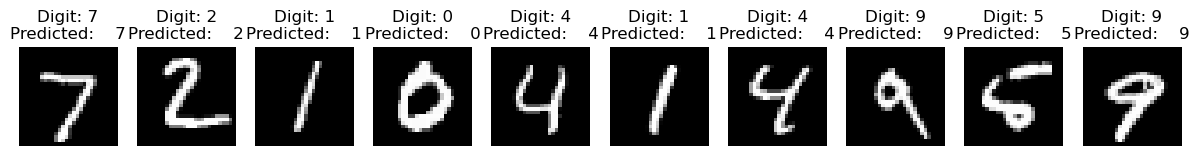

In [54]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions_SGD = model_DNN_SGD.predict(X_test)
prediction_Adadelta=model_DNN_Adadelta.predict(X_test)
prediction_RMSprop=model_DNN_RMSprop.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_SGD[i])))    
    plt.axis('off') 
plt.show()

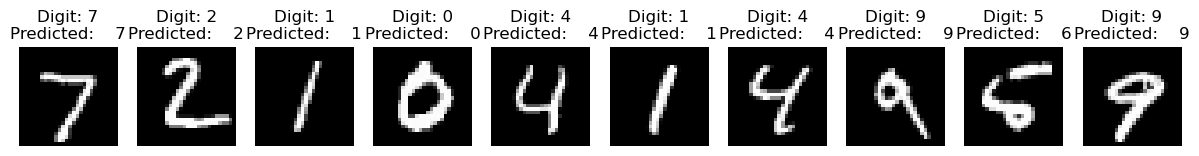

In [58]:
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(prediction_Adadelta[i])))    
    plt.axis('off') 
plt.show()

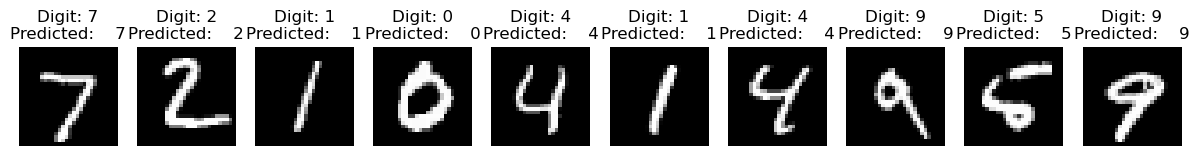

In [60]:
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(prediction_RMSprop[i])))    
    plt.axis('off') 
plt.show()

Nonostante tutti e tre gli ottimizzatori portino a risultati quasi del tutto corretti, guardando la loss e l'accuracy del modello è evidente che RMSprop non è adatto come ottimizzatore poichè porta a una loss dei dati di test nettamente superiore rispetto al dataset di train e l'accuracy di test, seppur alta, è minore di quella di train. Con questo ottimizzatore si va incontro all'overfit dei dati. La stessa cosa non accade con Adadelta, tuttavia esso presenta accuracy minore rispetto agli altri ottimizzatori e una loss decisamente maggiore. SGD risulta essere l'ottimizzatore con accuracy più alta e loss più bassa. 

#### Reti Neurali Convoluzionali
Per sfruttare al meglio l'invarianza traslazionale dei pixel, oltre alle informazioni locali dei singoli, si implementa una rete neurale convoluzionale. 

Bisogna quinsi cambiare la forma dell'input come segue:

In [23]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


### Exercise 12.2

struttura dell CNN creata:

- layer MaxPooling(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))): una finestra 2x2 scorre sui dati di input e per ogni gruppo seleziona il massimo; prosegue spostandosi di due lungo x e y;
- layer Conv2D(16, kernel_size=(5,5), activation='relu', input_shape=input_shape)): 16 filtri di dimensione 5x5 scorrono sui dati di input, ognuno impara a riconoscere una caratteristica dell'immagine.
- layer Flatten(): appiattisce i dati in forma vettoriale
- layer Dense(): layer di di neuroni densamente connessi; l'ultimo layer in particolare è necessario per avere un output organizzato in 10 classi, una per ogni possibile cifra. La funzione soft max è necessaria per convertire l'output in numeri tra 0 e 1 la cui somma è uno, quindi in probabilità; alla fine viene selezionata la classe con probabilità maggiore. 

In [25]:

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',#si può aggiumgere un'attivazione alla fine del calcolo della convoluzione
                     input_shape=input_shape))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5,5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
              
                        
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

Alleniamo e valutiamo il modello come già fatto in precedenza:

In [27]:
# training parameters
batch_size = 32
epochs = 30 # INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history_CNN=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,#possiamo aggiungere uno shuffle come c'è in uno specchietto sopra
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/Users/flavia/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - acc: 0.6574 - loss: 1.0669 - val_acc: 0.9465 - val_loss: 0.1813
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - acc: 0.9501 - loss: 0.1708 - val_acc: 0.9669 - val_loss: 0.1111
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - acc: 0.9649 - loss: 0.1180 - val_acc: 0.9729 - val_loss: 0.0852
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - acc: 0.9714 - loss: 0.0944 - val_acc: 0.9768 - val_loss: 0.0715
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - acc: 0.9757 - loss: 0.0803 - val_acc: 0.9794 - val_loss: 0.0627
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.9789 - loss: 0.0706 - val_acc: 0.9815 - val_loss: 0.0566
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - acc: 0.9810 - loss: 0.0632 - val_acc: 0.9834 - val_loss: 0.0523
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - acc: 0.9829 - loss: 0.0573 - val_acc: 0.9845 - val_loss: 0.0487
Epoch 9/30
1875/1875 ━━━

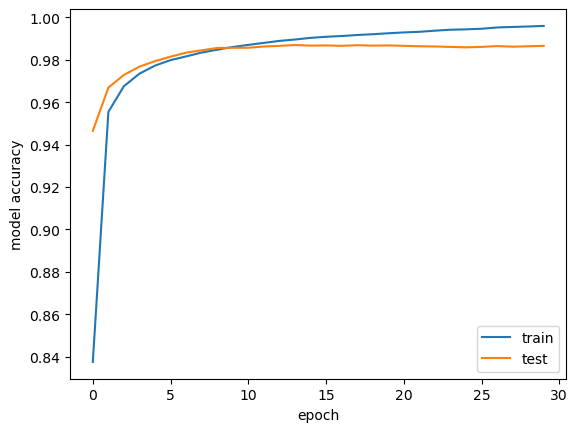

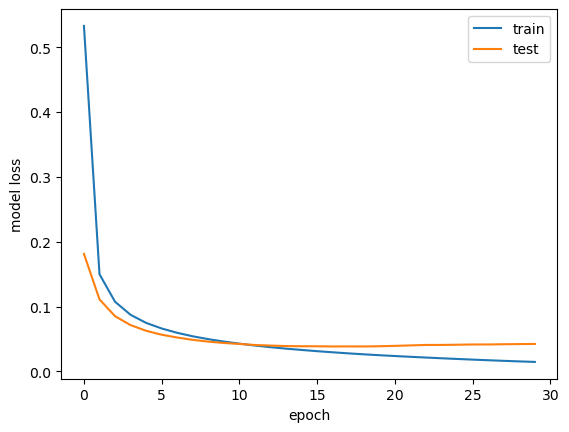

In [28]:
# evaluate model - questa parte la fa già sopra
#score = model_CNN.evaluate(X_test, Y_test, verbose=1) 

# print performance
#print()
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy - i grafici sono sospettosamente uguali a quelli sopra
plt.plot(history_CNN.history['acc'])
plt.plot(history_CNN.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
X shape (10000, 28, 28, 1)


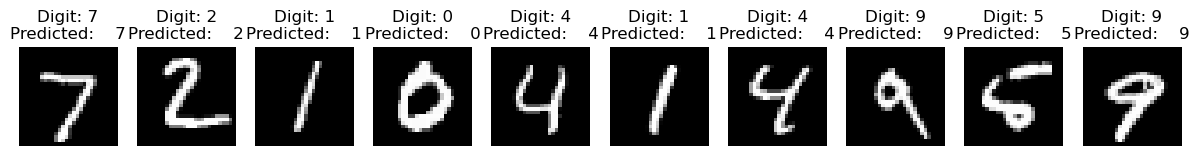

In [31]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)
print('X shape', X_test.shape)

#X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
#print('X reshape', X_test.shape)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Esercizio 12.3
Con l'applicazione `gimp` si sono create 10 immagini di cifre scritte a mano su cui testare i dati. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


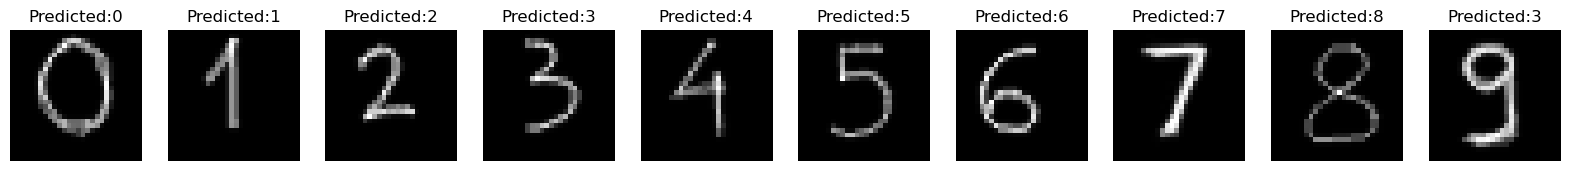

In [34]:
from PIL import Image
import os

digit_images=[]
input_images_data=[]

for n in range (10): 
    digit_filename=f"cifre/{n}.png"
    digit_in=Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load()
    data=np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data/=255
    digit_images.append(data)
    data = data.reshape(xdim,ydim,1)
    input_images_data.append(data)

test=np.array(input_images_data)
predictions= model_CNN.predict(test)

plt.figure(figsize=(20, 5)) 
for i in range(10):    
    plt.subplot(2, 10, i + 1)    
    plt.imshow(digit_images[i], cmap='gray')    
    plt.title(f"Predicted:{np.argmax(predictions[i])}" )    
    plt.axis('off') 
plt.show()